In [1]:
from PIL import Image
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from torchvision.transforms import ToTensor
from yolo_utils import *
from utils import  fix_channels

In [2]:
# Here you should put the path of your image
IMAGE_PATH = "/Users/guybasson/Desktop/sdatta-nlp/photos/japan-wrap-dress.jpg"

In [3]:
# This is the order of the categories list. NO NOT CHANGE. Just for visualization purposes
cats = ['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']

In [4]:
# Random colors used for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

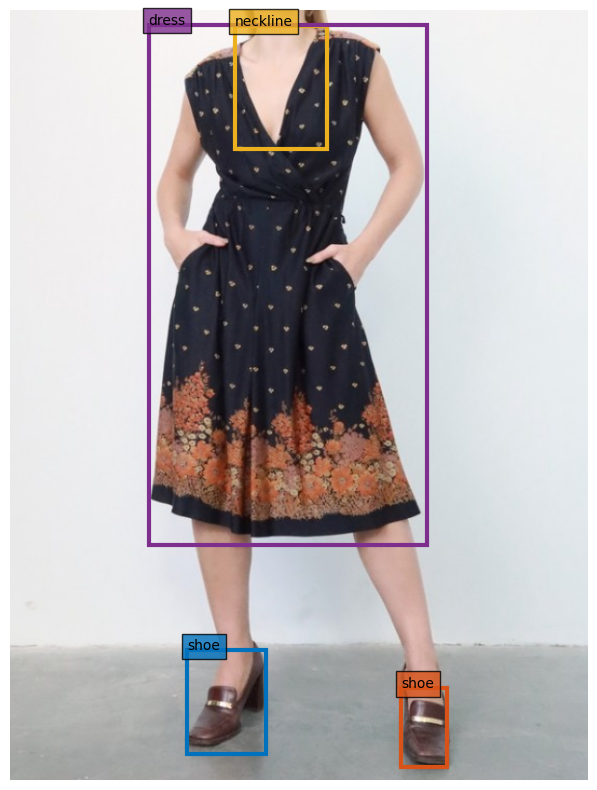

In [ ]:
MODEL_NAME = "valentinafeve/yolos-fashionpedia"
feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model = YolosForObjectDetection.from_pretrained(MODEL_NAME)
image = Image.open(open(IMAGE_PATH, "rb"))
image = fix_channels(ToTensor()(image))
image = image.resize((600, 800))
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
img = visualize_predictions(image, outputs, COLORS, cats, threshold=0.9)
img